In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [2]:
import pickle

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
def load_object(filename):
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [5]:
def save_object(obj, filename):
    with open(filename+".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()

In [6]:
df = pd.DataFrame(load_object('model_result_table'))

In [4]:
drive_path = "drive/MyDrive/"

In [5]:
method_results = list(filter(lambda x: "Results of" in x, os.listdir(drive_path)))
method_results

['Results of GP combiner project',
 'Results of GP combiner KP faoselm',
 'Results of GP combiner faoselm ',
 'Results of GP combiner oselm project']

In [11]:
results = {}
method_names = ['benchmark', 'oselm', 'fa-oselm', 'kp-faoselm']
i = 0
for method_folder in method_results:
    current_method_path = os.path.join(drive_path, method_folder)
    datasets = os.listdir(current_method_path)
    result_level_1 = {}
    for dataset in datasets:
        
        if "sorted" not in '{}'.format(dataset) and "HIKAR" not in '{}'.format(dataset) and "7bl" not in '{}'.format(dataset):
           print(dataset)
        # if dataset not in ['sorted_KDD', 'HIKARI2021']:
           curr_dataset_path = os.path.join(current_method_path, dataset)
           feature_slection_name = os.listdir(curr_dataset_path)[1]
           chunks_path = os.path.join(curr_dataset_path, feature_slection_name)
           chunks = os.listdir(chunks_path)

           result_level_2 = {}
           for chunk in chunks:
               
               result_path = os.path.join(chunks_path, chunk, '{}_prediction.pkl'.format(chunk))
               print(result_path)
               with open(result_path, 'rb') as f:
                  r = pickle.load(f)
               result_level_2[chunk] = r
           result_level_1[dataset] = result_level_2
    results[method_names[i]] = result_level_1
    i += 1

7gradualDrift
drive/MyDrive/Results of GP combiner project/7gradualDrift/group_classifiers_1_DDM_logistic_regressionwith evolving matrix/chunk_id 0/chunk_id 0_prediction.pkl
drive/MyDrive/Results of GP combiner project/7gradualDrift/group_classifiers_1_DDM_logistic_regressionwith evolving matrix/chunk_id 1/chunk_id 1_prediction.pkl
drive/MyDrive/Results of GP combiner project/7gradualDrift/group_classifiers_1_DDM_logistic_regressionwith evolving matrix/chunk_id 2/chunk_id 2_prediction.pkl
drive/MyDrive/Results of GP combiner project/7gradualDrift/group_classifiers_1_DDM_logistic_regressionwith evolving matrix/chunk_id 3/chunk_id 3_prediction.pkl
drive/MyDrive/Results of GP combiner project/7gradualDrift/group_classifiers_1_DDM_logistic_regressionwith evolving matrix/chunk_id 4/chunk_id 4_prediction.pkl
drive/MyDrive/Results of GP combiner project/7gradualDrift/group_classifiers_1_DDM_logistic_regressionwith evolving matrix/chunk_id 5/chunk_id 5_prediction.pkl
drive/MyDrive/Results of G

In [12]:
results

{'benchmark': {'7gradualDrift': {'chunk_id 0': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 0, 0, ..., 0, 0, 1])},
   'chunk_id 1': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 0, 0, ..., 0, 0, 0])},
   'chunk_id 2': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 0, 0, ..., 0, 0, 0])},
   'chunk_id 3': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 1, 0, ..., 1, 1, 1])},
   'chunk_id 4': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 0, 0, ..., 0, 0, 0])},
   'chunk_id 5': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 0, 0, ..., 0, 0, 0])},
   'chunk_id 6': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([0, 0, 0, ..., 0, 0, 0])},
   'chunk_id 7': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([1, 0, 1, ..., 0, 1, 1])}},
  '7recurrentDrift': {'chunk_id 0': {'y_true': array([0, 0, 0, ..., 1, 1, 1]),
    'y_pred': array([1, 0, 0, ...,

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
def Convert_To_DataFarme(name_pkl, method_name):
    filenames = list(name_pkl.keys())
    name=[]
    accuracies, precisions, recalls, f1_scores = [], [], [], []
    idx = 0
    chunk_id = []
    for filename in (filenames):
        for key in name_pkl[filename].keys():
            y_pred = name_pkl[filename][key]['y_pred']
            y_true =  name_pkl[filename][key]['y_true']
            name.append(filename)
            accuracies.append(accuracy_score(y_true, y_pred))
            precisions.append(precision_score(y_true, y_pred))
            recalls.append(recall_score(y_true, y_pred))
            f1_scores.append(f1_score(y_true, y_pred))
            chunk_id.append(idx)
            idx += 1
        idx = 0
    method = [method_name] * len(accuracies)
    df = pd.DataFrame({'filename':name, 'chunk_id': chunk_id,'accuracy': accuracies,
                       'precision': precisions, 'recall': recalls, 'f1_score': f1_scores,
                       'method_name': method
                      })

    return df

In [14]:
faoselm_df = Convert_To_DataFarme(results['fa-oselm'], 'FA-OSELM')

In [15]:
oselm_df = Convert_To_DataFarme(results['oselm'], 'OSELM')
kp_faoselm_df = Convert_To_DataFarme(results['kp-faoselm'], 'KP-FAOSELM')
ml_df = Convert_To_DataFarme(results['benchmark'], 'Traditional ML')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [16]:
df = pd.concat([faoselm_df, oselm_df, kp_faoselm_df, ml_df], axis=0)
df.head()

,filename,chunk_id,accuracy,precision,recall,f1_score,method_name
0,7gradualDrift,0,0.575498,0.632850,0.359643,0.458643,FA-OSELM
1,7gradualDrift,1,0.765857,0.809222,0.695738,0.748201,FA-OSELM
2,7gradualDrift,2,0.695859,0.843044,0.481331,0.612792,FA-OSELM
3,7gradualDrift,3,0.745910,0.864706,0.583044,0.696476,FA-OSELM
4,7gradualDrift,4,0.688667,0.826037,0.478000,0.605574,FA-OSELM


In [17]:
def describe_result(df, dataset_name):
    print(df[df['filename'] == dataset_name].drop('chunk_id', axis=1).groupby('method_name').describe().T)

In [18]:
sns.set(rc = {'figure.figsize':(22,12)}, style="whitegrid")

def barplot(data, title,x, y, hue='method_name'):
    ax = sns.catplot(x=x, y=y, hue=hue, data=data, kind='bar',
           height=3, aspect=4)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig('{}'.format(title))
    plt.show()

In [19]:
df['filename'].unique()

array(['7gradualDrift', '7recurrentDrift', '7suddenDrift', 'blip',
       'incrementalDrift'], dtype=object)

In [20]:
grouped_df = df.drop('chunk_id', axis=1).groupby(['filename','method_name']).mean().reset_index()

In [21]:
grouped_df.head(20)

,filename,method_name,accuracy,precision,recall,f1_score
0,7gradualDrift,FA-OSELM,0.691389,0.827772,0.486469,0.606438
1,7gradualDrift,KP-FAOSELM,0.675500,0.832180,0.437896,0.563489
2,7gradualDrift,OSELM,0.685814,0.827737,0.468578,0.594105
3,7gradualDrift,Traditional ML,0.574870,0.276764,0.229014,0.239153
4,7recurrentDrift,FA-OSELM,0.765061,0.839881,0.656913,0.732660
5,7recurrentDrift,KP-FAOSELM,0.778063,0.847023,0.681983,0.753016
6,7recurrentDrift,OSELM,0.790275,0.847217,0.717460,0.773108
7,7recurrentDrift,Traditional ML,0.756140,0.830558,0.650593,0.725601
8,7suddenDrift,FA-OSELM,0.673340,0.788822,0.463768,0.571127
9,7suddenDrift,KP-FAOSELM,0.685237,0.839032,0.451474,0.573860


In [22]:
grouped_df.groupby(['filename', 'method_name']).agg(['mean', 'median', 'max']).sort_values(by=('f1_score', 'median'), ascending=False)

accuracy                     precision  \
                                     mean    median       max      mean   
filename         method_name                                              
incrementalDrift FA-OSELM        0.837903  0.837903  0.837903  0.901539   
                 KP-FAOSELM      0.829350  0.829350  0.829350  0.884645   
                 OSELM           0.818864  0.818864  0.818864  0.876623   
7recurrentDrift  OSELM           0.790275  0.790275  0.790275  0.847217   
incrementalDrift Traditional ML  0.784491  0.784491  0.784491  0.845379   
7recurrentDrift  KP-FAOSELM      0.778063  0.778063  0.778063  0.847023   
                 FA-OSELM        0.765061  0.765061  0.765061  0.839881   
                 Traditional ML  0.756140  0.756140  0.756140  0.830558   
blip             Traditional ML  0.728623  0.728623  0.728623  0.822514   
                 KP-FAOSELM      0.709567  0.709567  0.709567  0.786131   
7gradualDrift    FA-OSELM        0.691389  0.691389  0.691389  0.827772   
                 OSELM           0.685814  0.685814  0.685814  0.827737   
blip             OSELM           0.672185  0.672185  0.672185  0.789063   
7suddenDrift     KP-FAOSELM      0.685237  0.685237  0.685237  0.839032   
                 FA-OSELM        0.673340  0.673340  0.673340  0.788822   
                 Traditional ML  0.675626  0.675626  0.675626  0.799394   
blip             FA-OSELM        0.657205  0.657205  0.657205  0.775792   
7gradualDrift    KP-FAOSELM      0.675500  0.675500  0.675500  0.832180   
7suddenDrift     OSELM           0.670695  0.670695  0.670695  0.836166   
7gradualDrift    Traditional ML  0.574870  0.574870  0.574870  0.276764   

                                                       recall            \
                                   median       max      mean    median   
filename         method_name                                              
incrementalDrift FA-OSELM        0.901539  0.901539  0.759894  0.759894   
                 KP-FAOSELM      0.884645  0.884645  0.761203  0.761203   
                 OSELM           0.876623  0.876623  0.754628  0.754628   
7recurrentDrift  OSELM           0.847217  0.847217  0.717460  0.717460   
incrementalDrift Traditional ML  0.845379  0.845379  0.702181  0.702181   
7recurrentDrift  KP-FAOSELM      0.847023  0.847023  0.681983  0.681983   
                 FA-OSELM        0.839881  0.839881  0.656913  0.656913   
                 Traditional ML  0.830558  0.830558  0.650593  0.650593   
blip             Traditional ML  0.822514  0.822514  0.597268  0.597268   
                 KP-FAOSELM      0.786131  0.786131  0.591372  0.591372   
7gradualDrift    FA-OSELM        0.827772  0.827772  0.486469  0.486469   
                 OSELM           0.827737  0.827737  0.468578  0.468578   
blip             OSELM           0.789063  0.789063  0.504559  0.504559   
7suddenDrift     KP-FAOSELM      0.839032  0.839032  0.451474  0.451474   
                 FA-OSELM        0.788822  0.788822  0.463768  0.463768   
                 Traditional ML  0.799394  0.799394  0.459845  0.459845   
blip             FA-OSELM        0.775792  0.775792  0.463742  0.463742   
7gradualDrift    KP-FAOSELM      0.832180  0.832180  0.437896  0.437896   
7suddenDrift     OSELM           0.836166  0.836166  0.430543  0.430543   
7gradualDrift    Traditional ML  0.276764  0.276764  0.229014  0.229014   

                                           f1_score                      
                                      max      mean    median       max  
filename         method_name                                             
incrementalDrift FA-OSELM        0.759894  0.823429  0.823429  0.823429  
                 KP-FAOSELM      0.761203  0.817165  0.817165  0.817165  
                 OSELM           0.754628  0.806258  0.806258  0.806258  
7recurrentDrift  OSELM           0.717460  0.773108  0.773108  0.773108  
incrementalDrift Traditional ML  0.702181  0.765048  0.765048  

In [23]:
grouped_df.groupby(['filename', 'method_name']).agg(['mean', 'median', 'max']).sort_values(by=('precision', 'median'), ascending=False)

accuracy                     precision  \
                                     mean    median       max      mean   
filename         method_name                                              
incrementalDrift FA-OSELM        0.837903  0.837903  0.837903  0.901539   
                 KP-FAOSELM      0.829350  0.829350  0.829350  0.884645   
                 OSELM           0.818864  0.818864  0.818864  0.876623   
7recurrentDrift  OSELM           0.790275  0.790275  0.790275  0.847217   
                 KP-FAOSELM      0.778063  0.778063  0.778063  0.847023   
incrementalDrift Traditional ML  0.784491  0.784491  0.784491  0.845379   
7recurrentDrift  FA-OSELM        0.765061  0.765061  0.765061  0.839881   
7suddenDrift     KP-FAOSELM      0.685237  0.685237  0.685237  0.839032   
                 OSELM           0.670695  0.670695  0.670695  0.836166   
7gradualDrift    KP-FAOSELM      0.675500  0.675500  0.675500  0.832180   
7recurrentDrift  Traditional ML  0.756140  0.756140  0.756140  0.830558   
7gradualDrift    FA-OSELM        0.691389  0.691389  0.691389  0.827772   
                 OSELM           0.685814  0.685814  0.685814  0.827737   
blip             Traditional ML  0.728623  0.728623  0.728623  0.822514   
7suddenDrift     Traditional ML  0.675626  0.675626  0.675626  0.799394   
blip             OSELM           0.672185  0.672185  0.672185  0.789063   
7suddenDrift     FA-OSELM        0.673340  0.673340  0.673340  0.788822   
blip             KP-FAOSELM      0.709567  0.709567  0.709567  0.786131   
                 FA-OSELM        0.657205  0.657205  0.657205  0.775792   
7gradualDrift    Traditional ML  0.574870  0.574870  0.574870  0.276764   

                                                       recall            \
                                   median       max      mean    median   
filename         method_name                                              
incrementalDrift FA-OSELM        0.901539  0.901539  0.759894  0.759894   
                 KP-FAOSELM      0.884645  0.884645  0.761203  0.761203   
                 OSELM           0.876623  0.876623  0.754628  0.754628   
7recurrentDrift  OSELM           0.847217  0.847217  0.717460  0.717460   
                 KP-FAOSELM      0.847023  0.847023  0.681983  0.681983   
incrementalDrift Traditional ML  0.845379  0.845379  0.702181  0.702181   
7recurrentDrift  FA-OSELM        0.839881  0.839881  0.656913  0.656913   
7suddenDrift     KP-FAOSELM      0.839032  0.839032  0.451474  0.451474   
                 OSELM           0.836166  0.836166  0.430543  0.430543   
7gradualDrift    KP-FAOSELM      0.832180  0.832180  0.437896  0.437896   
7recurrentDrift  Traditional ML  0.830558  0.830558  0.650593  0.650593   
7gradualDrift    FA-OSELM        0.827772  0.827772  0.486469  0.486469   
                 OSELM           0.827737  0.827737  0.468578  0.468578   
blip             Traditional ML  0.822514  0.822514  0.597268  0.597268   
7suddenDrift     Traditional ML  0.799394  0.799394  0.459845  0.459845   
blip             OSELM           0.789063  0.789063  0.504559  0.504559   
7suddenDrift     FA-OSELM        0.788822  0.788822  0.463768  0.463768   
blip             KP-FAOSELM      0.786131  0.786131  0.591372  0.591372   
                 FA-OSELM        0.775792  0.775792  0.463742  0.463742   
7gradualDrift    Traditional ML  0.276764  0.276764  0.229014  0.229014   

                                           f1_score                      
                                      max      mean    median       max  
filename         method_name                                             
incrementalDrift FA-OSELM        0.759894  0.823429  0.823429  0.823429  
                 KP-FAOSELM      0.761203  0.817165  0.817165  0.817165  
                 OSELM           0.754628  0.806258  0.806258  0.806258  
7recurrentDrift  OSELM           0.717460  0.773108  0.773108  0.773108  
                 KP-FAOSELM      0.681983  0.753016  0.753016  

In [24]:
grouped_df.groupby(['filename', 'method_name']).agg(['mean', 'median', 'max']).sort_values(by=('accuracy', 'median'), ascending=False)

accuracy                     precision  \
                                     mean    median       max      mean   
filename         method_name                                              
incrementalDrift FA-OSELM        0.837903  0.837903  0.837903  0.901539   
                 KP-FAOSELM      0.829350  0.829350  0.829350  0.884645   
                 OSELM           0.818864  0.818864  0.818864  0.876623   
7recurrentDrift  OSELM           0.790275  0.790275  0.790275  0.847217   
incrementalDrift Traditional ML  0.784491  0.784491  0.784491  0.845379   
7recurrentDrift  KP-FAOSELM      0.778063  0.778063  0.778063  0.847023   
                 FA-OSELM        0.765061  0.765061  0.765061  0.839881   
                 Traditional ML  0.756140  0.756140  0.756140  0.830558   
blip             Traditional ML  0.728623  0.728623  0.728623  0.822514   
                 KP-FAOSELM      0.709567  0.709567  0.709567  0.786131   
7gradualDrift    FA-OSELM        0.691389  0.691389  0.691389  0.827772   
                 OSELM           0.685814  0.685814  0.685814  0.827737   
7suddenDrift     KP-FAOSELM      0.685237  0.685237  0.685237  0.839032   
                 Traditional ML  0.675626  0.675626  0.675626  0.799394   
7gradualDrift    KP-FAOSELM      0.675500  0.675500  0.675500  0.832180   
7suddenDrift     FA-OSELM        0.673340  0.673340  0.673340  0.788822   
blip             OSELM           0.672185  0.672185  0.672185  0.789063   
7suddenDrift     OSELM           0.670695  0.670695  0.670695  0.836166   
blip             FA-OSELM        0.657205  0.657205  0.657205  0.775792   
7gradualDrift    Traditional ML  0.574870  0.574870  0.574870  0.276764   

                                                       recall            \
                                   median       max      mean    median   
filename         method_name                                              
incrementalDrift FA-OSELM        0.901539  0.901539  0.759894  0.759894   
                 KP-FAOSELM      0.884645  0.884645  0.761203  0.761203   
                 OSELM           0.876623  0.876623  0.754628  0.754628   
7recurrentDrift  OSELM           0.847217  0.847217  0.717460  0.717460   
incrementalDrift Traditional ML  0.845379  0.845379  0.702181  0.702181   
7recurrentDrift  KP-FAOSELM      0.847023  0.847023  0.681983  0.681983   
                 FA-OSELM        0.839881  0.839881  0.656913  0.656913   
                 Traditional ML  0.830558  0.830558  0.650593  0.650593   
blip             Traditional ML  0.822514  0.822514  0.597268  0.597268   
                 KP-FAOSELM      0.786131  0.786131  0.591372  0.591372   
7gradualDrift    FA-OSELM        0.827772  0.827772  0.486469  0.486469   
                 OSELM           0.827737  0.827737  0.468578  0.468578   
7suddenDrift     KP-FAOSELM      0.839032  0.839032  0.451474  0.451474   
                 Traditional ML  0.799394  0.799394  0.459845  0.459845   
7gradualDrift    KP-FAOSELM      0.832180  0.832180  0.437896  0.437896   
7suddenDrift     FA-OSELM        0.788822  0.788822  0.463768  0.463768   
blip             OSELM           0.789063  0.789063  0.504559  0.504559   
7suddenDrift     OSELM           0.836166  0.836166  0.430543  0.430543   
blip             FA-OSELM        0.775792  0.775792  0.463742  0.463742   
7gradualDrift    Traditional ML  0.276764  0.276764  0.229014  0.229014   

                                           f1_score                      
                                      max      mean    median       max  
filename         method_name                                             
incrementalDrift FA-OSELM        0.759894  0.823429  0.823429  0.823429  
                 KP-FAOSELM      0.761203  0.817165  0.817165  0.817165  
                 OSELM           0.754628  0.806258  0.806258  0.806258  
7recurrentDrift  OSELM           0.717460  0.773108  0.773108  0.773108  
incrementalDrift Traditional ML  0.702181  0.765048  0.765048  

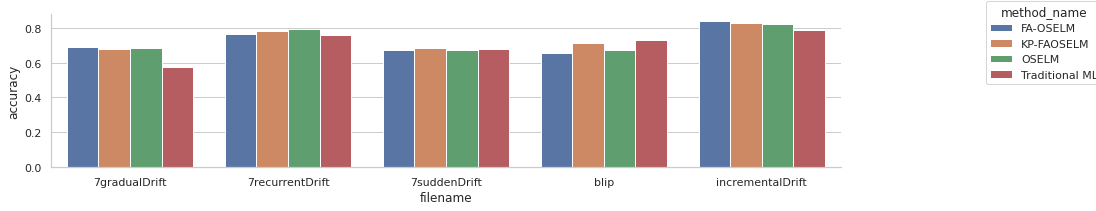

In [25]:
barplot(grouped_df, title='accuracy.png', x='filename', y='accuracy', hue='method_name')

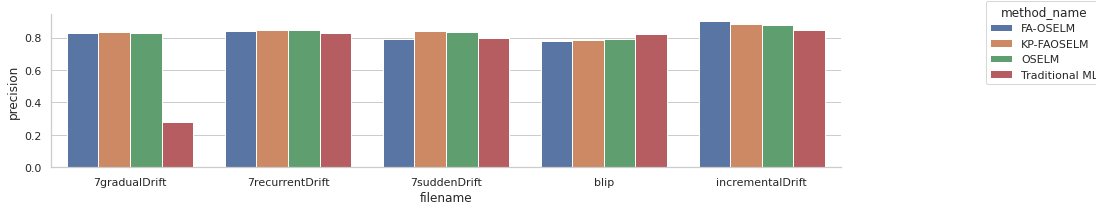

In [26]:
barplot(grouped_df, title='precision.png', x='filename', y='precision', hue='method_name')

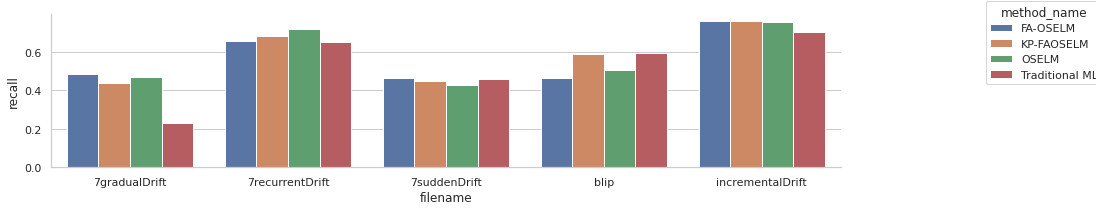

In [27]:
barplot(grouped_df, title='recall.png', x='filename', y='recall', hue='method_name')

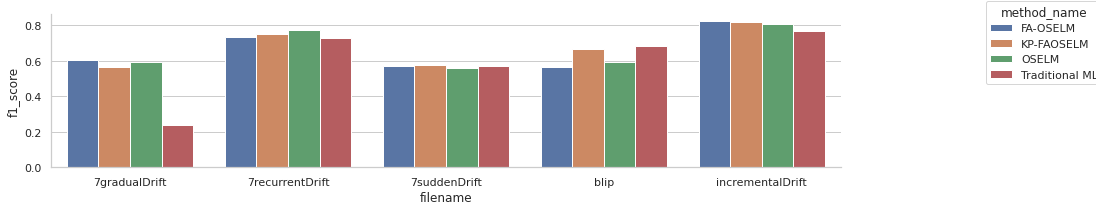

In [28]:
barplot(grouped_df, title='f1_score.png', x='filename', y='f1_score', hue='method_name')

In [29]:
def get_specific_data(df, datasetname, method_name, target_col):
    space_size = df[(df['filename'] == datasetname) & (df['method_name'] == method_name)][target_col].tolist()
    return space_size

In [30]:
METRICES = ['accuracy', 'precision', 'recall', 'f1_score']
def metrices_visulization(df, datasetname):
    
    fig, ax = plt.subplots(2, 2, figsize=(18, 8))
    #sorted(get_specific_data(dataset_name, method_name, 'SVM', 'space_size'))
    Y = []
    for metric in METRICES:
        for method_name in df['method_name'].unique():
            Y.append(get_specific_data(df, dataset_name, method_name, metric))
    idx = 0
    y_index = 0
    for i in range(2):
        for j in range(2):
            for method_name in df['method_name'].unique():
                x = list(range(len(Y[y_index])))
                ax[i, j].scatter(x=x, y=Y[y_index])
                ax[i, j].plot(x, Y[y_index], label='{}'.format(method_name))
                ax[i, j].set_title('{}'.format(METRICES[idx]))
                ax[i, j].set_xlabel('Chunk number')
                ax[i, j].set_ylabel('{}'.format(METRICES[idx]))
                y_index += 1
            idx += 1
    
    plt.title('Dataset: {}, method_name: {}'.format(dataset_name, method_name))
    plt.legend()
    plt.tight_layout()
    #plt.savefig('Dataset: {}, method_name: {} metrices'.format(dataset_name, method_name))
    plt.show()

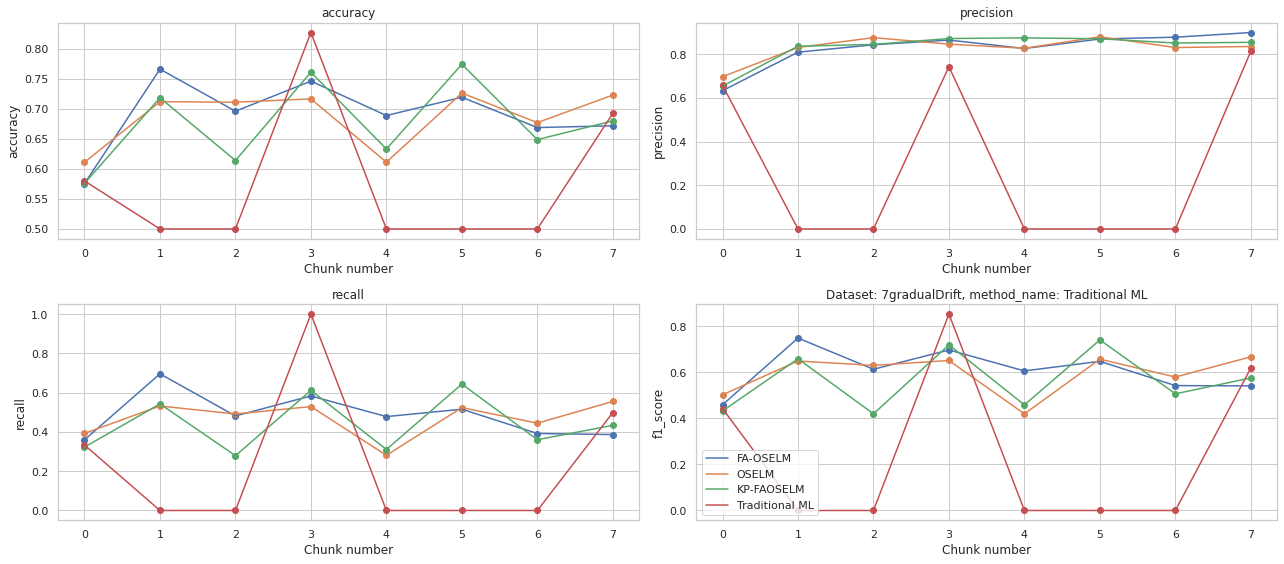

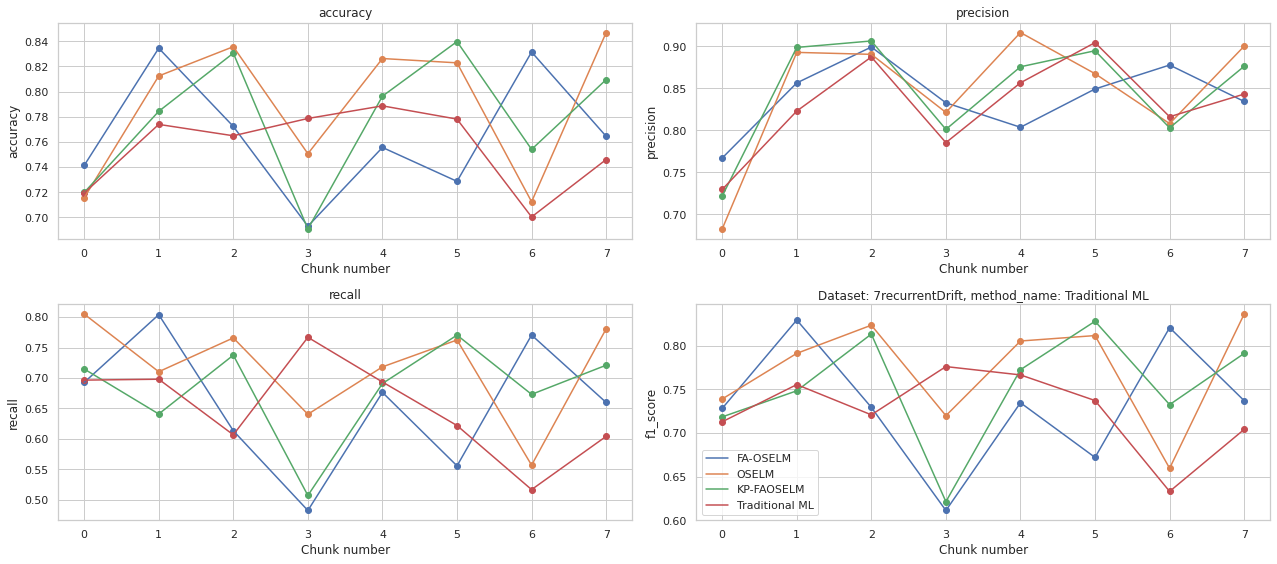

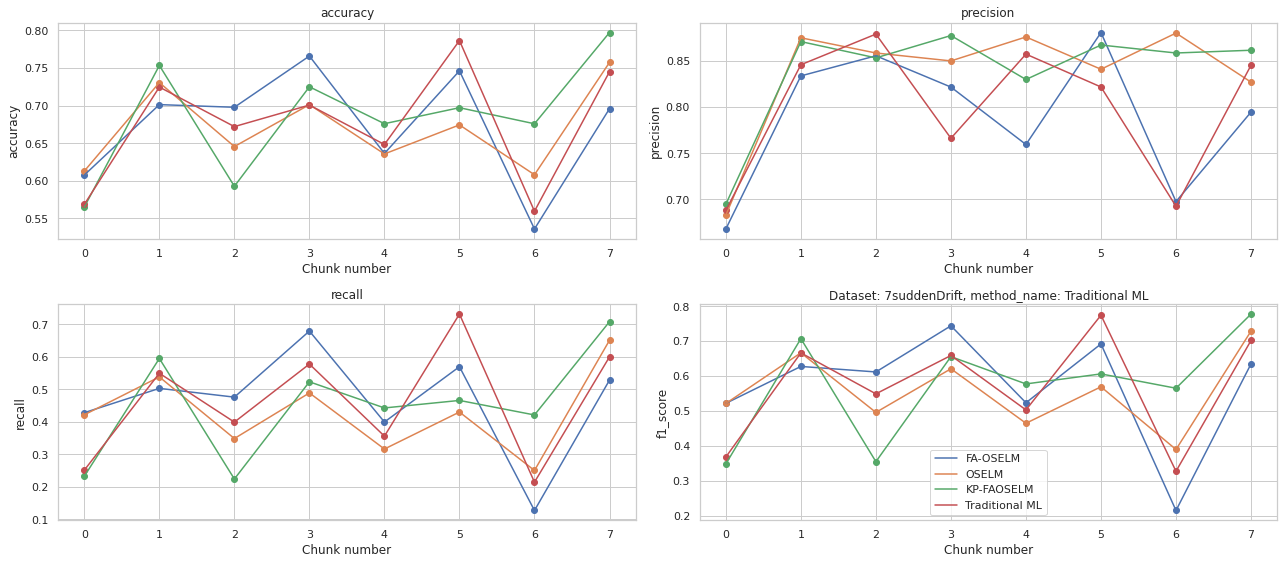

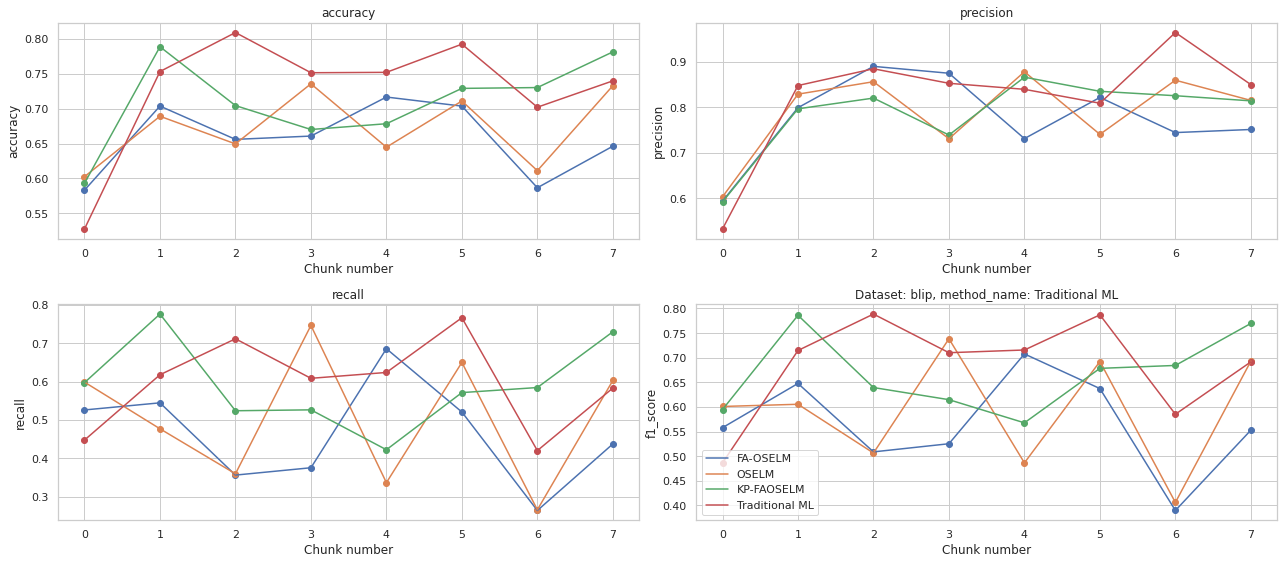

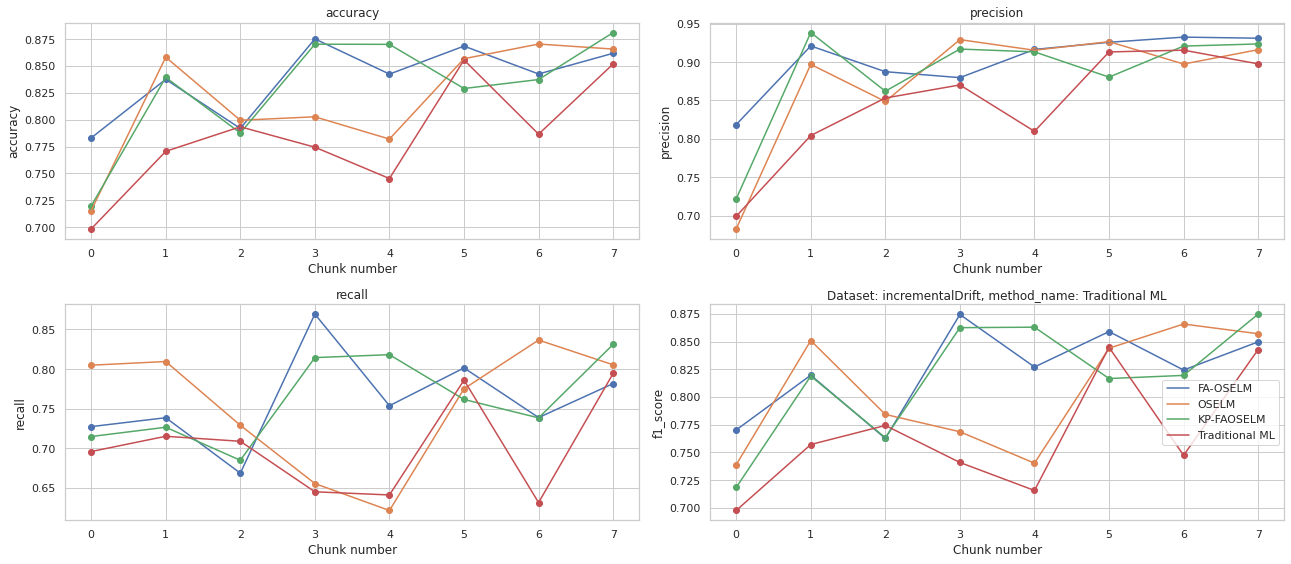

In [31]:
for dataset_name in df['filename'].unique():
    metrices_visulization(df, dataset_name)